# Inspecting the network: The Inspector class

When building network models, it is important to evaluate the created networks to ensure they are a valid representation of the target network.
For this purpose, pop2net provides a couple of tools.

In [1]:
import pandas as pd
import pop2net

df_school = pd.read_csv("example_school_data.csv", sep=";")


class TeachersInClassRoom(pop2net.MeltLocation):
    def setup(self):
        self.n_agents = 1

    def filter(self, agent):
        return agent.status == "teacher"


class PupilsInClassRoom(pop2net.MeltLocation):
    def setup(self):
        self.n_agents = 4

    def filter(self, agent):
        return agent.status == "pupil"

    def split(self, agent):
        return agent.grade

    def stick_together(self, agent):
        return agent.friend_group


class ClassRoom(pop2net.MagicLocation):
    def melt(self):
        return [TeachersInClassRoom, PupilsInClassRoom]

    def weight(self, agent):
        return agent.hours * 10

    def project_weights(self, agent1, agent2) -> float:
        return min([self.get_weight(agent1), self.get_weight(agent2)])


class School(pop2net.MagicLocation):
    n_locations = 2

    def stick_together(self, agent):
        return agent.ClassRoom


class SoccerTeam(pop2net.MagicLocation):
    n_agents = 11

    def nest(self):
        return School


model = pop2net.Model()
creator = pop2net.Creator(model)
inspector = pop2net.NetworkInspector(model)

creator.create(
    df=df_school,
    location_classes=[
        ClassRoom,  # nested into School using `stick_together()`
        School,
        SoccerTeam,  # nested into School using `nest()`
    ],
)
inspector.plot_agent_network(agent_attrs=df_school.columns, agent_color="status")

#### Network measures

For a quick quanitative inspection of the network(s) produced, one can use `utils.network_measures()`:

In [2]:
inspector.network_measures()

[{'diameter': 3,
  'density': 1.0,
  'transitivity': 1.0,
  'avg_clustering': np.float64(0.07213356017951675),
  'avg_path_length': 1.6476190476190475},
 {'diameter': 3,
  'density': 1.0,
  'transitivity': 1.0,
  'avg_clustering': np.float64(0.08205940526212073),
  'avg_path_length': 1.6666666666666667}]

If the network is divided into independent clusters, this function returns the measures for each cluster.

#### Affiliation statistics

To get a quick overview of the number of affiliations per agents or location, use `inspector.eval_affiliations()`.
The first table shows how many agents are assigned to an instance of a location.
The second table shows the number of locations an agent is assigned to.

In [3]:
inspector.eval_affiliations()



______________________________________
Number of agents per location
______________________________________

                mean      std   min   25%   50%   75%   max
location_class                                             
ClassRoom        5.0  0.00000   5.0   5.0   5.0   5.0   5.0
School          21.0  0.00000  21.0  21.0  21.0  21.0  21.0
SoccerTeam      10.5  0.57735  10.0  10.0  10.5  11.0  11.0


______________________________________
Number of affiliated locations per agent
______________________________________

mean    2.952381
std     0.215540
min     2.000000
25%     3.000000
50%     3.000000
75%     3.000000
max     3.000000
Name: n_affiliated_locations, dtype: float64


#### Contact matrix

`utils.create_contact_matrix()` shows the contact intensity between agents using a contact matrix.
With no further input than the list of agents, the matrix shows the contact intensities for each pair of agents.

/mnt/nvme_storage/git/pop2net/src/pop2net/inspector.py:290: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


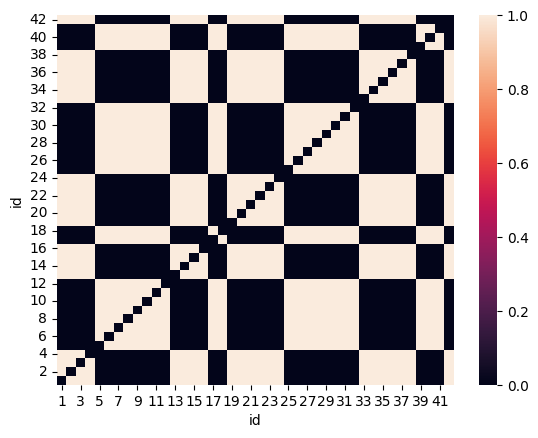

In [4]:
inspector.create_contact_matrix()  # noqa: F821

To aggregate the results, simply insert the name of an agent attribute for `attr`.
For instance, the following matrix shows the number of contacts between the different gender groups.

/mnt/nvme_storage/git/pop2net/src/pop2net/inspector.py:290: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


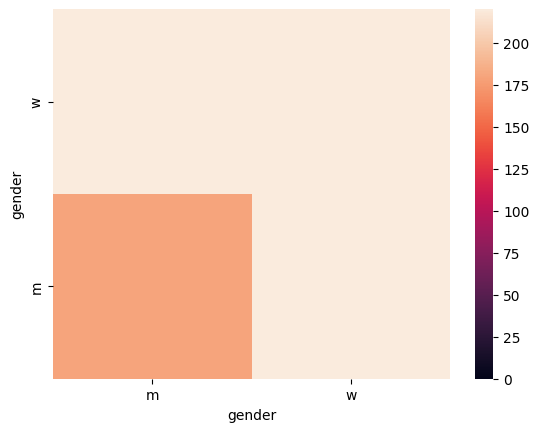

In [5]:
inspector.create_contact_matrix(attr="gender")  # noqa: F821

By setting `return_df` to `True`, the data of the matrix can be returned, too.

/mnt/nvme_storage/git/pop2net/src/pop2net/inspector.py:290: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


,m,w
w,220,220
m,180,220


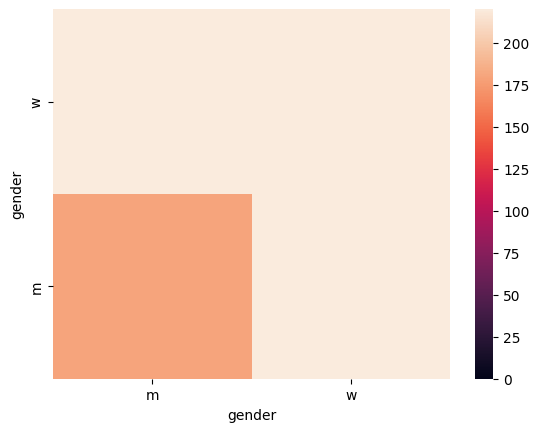

In [6]:
inspector.create_contact_matrix(attr="gender", return_df=True)  # noqa: F821